<a href="https://colab.research.google.com/github/anitamila/Final-Project-Live-Class-DQLab/blob/master/Final_Project_Live_Class_DQLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Understanding**

1. What is the overall sales and profit trend?
2. Which are the top 5 states with the most total sales?
3. Based on region, what product category has the highest profit and losses?
4. What segments are the main revenue contributors in sales?
5. Which shipping mode do customers use the most?"

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Data Understandng**

In [26]:
data = pd.read_csv('SuperStore - data.csv')

In [23]:
data.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        9994 non-null   object 
 1   Customer_ID     9994 non-null   object 
 2   Postal_Code     9994 non-null   int64  
 3   Product_ID      9994 non-null   object 
 4   Sales           9994 non-null   float64
 5   Quantity        9994 non-null   int64  
 6   Discount        9994 non-null   float64
 7   Profit          9994 non-null   float64
 8   Category        9994 non-null   object 
 9   Sub-Category    9994 non-null   object 
 10  Product_Name    9994 non-null   object 
 11  Order_Date      9994 non-null   object 
 12  Ship_Date       9994 non-null   object 
 13  Ship_Mode       9994 non-null   object 
 14  Customer_Name   9994 non-null   object 
 15  Segment         9994 non-null   object 
 16  Country/Region  9994 non-null   object 
 17  City            9994 non-null   o

# **Data Preparation**

In [ ]:
# checking missing value
data.isna().sum()

Order_ID          0
Customer_ID       0
Postal_Code       0
Product_ID        0
Sales             0
Quantity          0
Discount          0
Profit            0
Category          0
Sub-Category      0
Product_Name      0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
Country/Region    0
City              0
State             0
Region            0
dtype: int64

In [ ]:
data.describe().round()

,Postal_Code,Sales,Quantity,Discount,Profit
count,9994.0,9994.0,9994.0,9994.0,9994.0
mean,55190.0,230.0,4.0,0.0,29.0
std,32064.0,623.0,2.0,0.0,234.0
min,1040.0,0.0,1.0,0.0,-6600.0
25%,23223.0,17.0,2.0,0.0,2.0
50%,56430.0,54.0,3.0,0.0,9.0
75%,90008.0,210.0,5.0,0.0,29.0
max,99301.0,22638.0,14.0,1.0,8400.0


In [27]:
# delete variable which not used in analysis
data = data.drop(data.columns[:4], axis=1)
data = data.drop(['Product_Name', 'Customer_Name', 'Country/Region', 'City'], axis=1)
data.head()

,Sales,Quantity,Discount,Profit,Category,Sub-Category,Order_Date,Ship_Date,Ship_Mode,Segment,State,Region
0,261.9600,2,0.00,41.9136,Furniture,Bookcases,11/8/2019,11/11/2019,Second Class,Consumer,Kentucky,South
1,731.9400,3,0.00,219.5820,Furniture,Chairs,11/8/2019,11/11/2019,Second Class,Consumer,Kentucky,South
2,14.6200,2,0.00,6.8714,Office Supplies,Labels,6/12/2019,6/16/2019,Second Class,Corporate,California,West
3,957.5775,5,0.45,-383.0310,Furniture,Tables,10/11/2018,10/18/2018,Standard Class,Consumer,Florida,South
4,22.3680,2,0.20,2.5164,Office Supplies,Storage,10/11/2018,10/18/2018,Standard Class,Consumer,Florida,South


## Exploratory Data Analysis

In [28]:
data["Order_Date"] = pd.to_datetime(data["Order_Date"])
data["Ship_Date"] = pd.to_datetime(data["Ship_Date"])

In [29]:
data['Order_Date'].min()

Timestamp('2017-01-03 00:00:00')

In [32]:
data['Order_Date'].max()

Timestamp('2020-12-30 00:00:00')

In [31]:
data.head()

,Sales,Quantity,Discount,Profit,Category,Sub-Category,Order_Date,Ship_Date,Ship_Mode,Segment,State,Region
0,261.9600,2,0.00,41.9136,Furniture,Bookcases,2019-11-08,2019-11-11,Second Class,Consumer,Kentucky,South
1,731.9400,3,0.00,219.5820,Furniture,Chairs,2019-11-08,2019-11-11,Second Class,Consumer,Kentucky,South
2,14.6200,2,0.00,6.8714,Office Supplies,Labels,2019-06-12,2019-06-16,Second Class,Corporate,California,West
3,957.5775,5,0.45,-383.0310,Furniture,Tables,2018-10-11,2018-10-18,Standard Class,Consumer,Florida,South
4,22.3680,2,0.20,2.5164,Office Supplies,Storage,2018-10-11,2018-10-18,Standard Class,Consumer,Florida,South


## 1. What is the overall sales and profit trend?



In [ ]:
# Getting month year from order_date
data['month_year'] = data['Order_Date'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
# Grouping month_year by sales
data_temp = data.groupby('month_year').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
data_temp['Cumulative_Profit'] = data_temp['Profit'].cumsum()

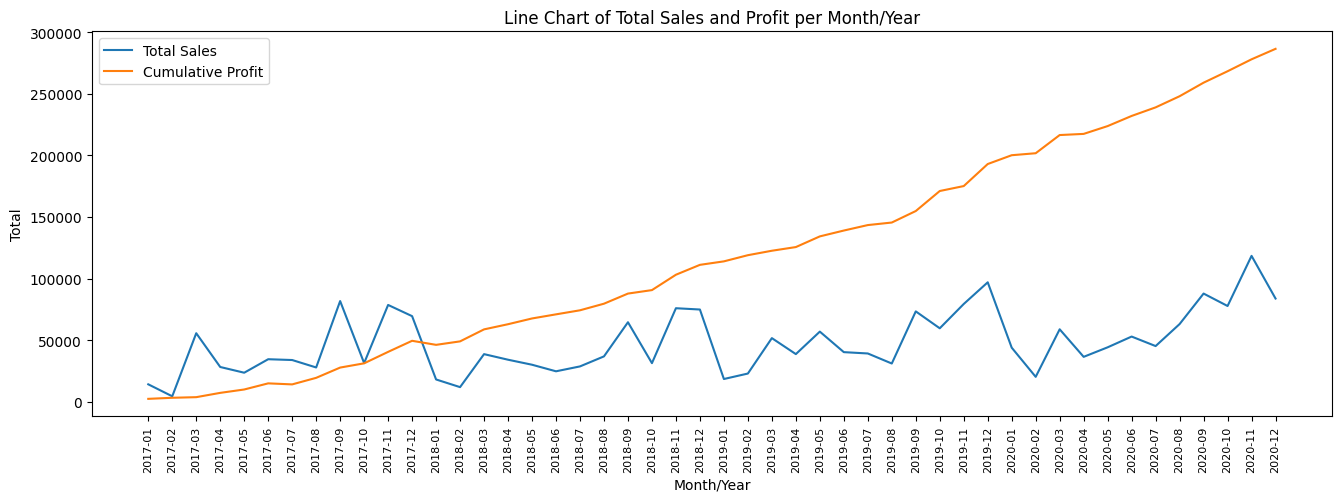

In [ ]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(data_temp['month_year'], data_temp['Sales'], label='Total Sales')
plt.plot(data_temp['month_year'], data_temp['Cumulative_Profit'], label='Cumulative Profit')
plt.xticks(rotation='vertical',size=8)

# add the label, title, and legend
plt.xlabel('Month/Year')
plt.ylabel('Total')
plt.title('Line Chart of Total Sales and Profit per Month/Year')
plt.legend()

# show plot
plt.show()

*   This sales level fluctuates almost the same every year which is known as a seasonal trend. These increases could occur due to several factors. For example, the increase in March could possibly occur due to spring promotions, the increase in September could possibly occur due to promotions for the new school year, and the increase in November-December could possibly occur due to promotions to welcome Christmas.
*   Meanwhile, the profits continue to increase every year. The growth in profits annually can reflect consistent business growth, which may result from increased sales, improved operational efficiency, or a successful marketing strategy.

## 2. Which are the top 5 states with the most total sales?

In [ ]:
# Grouping states by sales
state_sales = data.groupby('State')['Sales'].sum()

# Count states by sales in percentage
state_sales_percentage = ((state_sales / state_sales.sum()) * 100).apply(lambda x: f'{x:.1f}')

state_sales = pd.merge(state_sales, state_sales_percentage, on='State')
state_sales = state_sales.rename(columns={
    'Sales_x': 'Total_Sales',
    'Sales_y': 'Percentage_Sales'
})

# Top 5 state by sales
top_5_state = state_sales.nlargest(5, 'Total_Sales')

print("Top 5 Highest State by Sales:")
print(top_5_state)

Top 5 Highest State by Sales:
              Total_Sales Percentage_Sales
State                                     
California    457687.6315             19.9
New York      310876.2710             13.5
Texas         170188.0458              7.4
Washington    138641.2700              6.0
Pennsylvania  116511.9140              5.1


19.9% the highest total sales came from California, followed by New York, Texas, Washington, and Pennsylvania.

## 3. Based on region, what product category has the highest profit and losses?

In [ ]:
# Grouping profit by region
region_profit = pd.pivot_table(
    data=data,
    index= 'Region',
    values= 'Profit',
    aggfunc= 'sum'
).reset_index()

print("Total Profit by Region:")
print(region_profit)

Total Profit by Region:
    Region       Profit
0  Central   39706.3625
1     East   91522.7800
2    South   46749.4303
3     West  108418.4489


In [ ]:
# Grouping profit by category
category_profit = pd.pivot_table(
    data=data,
    index= 'Category',
    values= 'Profit',
    aggfunc= 'sum'
).reset_index()

print("Total Profit by Category:")
print(category_profit)

Total Profit by Category:
          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


*   From the four regions, the central region has the lowest total profit. Followed by the southern region, then the eastern region and the highest total profits are in the western region.
*   The highest profits are dominated by technology, and furniture is the category with the lowest profit.



In [ ]:
# Grouping profit by region and category
regcat_profit = pd.pivot_table(
    data=data,
    index= ['Region', 'Category'],
    values= 'Profit',
    aggfunc= 'sum'
).reset_index()

print("Total Profit by Region and Category:")
print(regcat_profit)

Total Profit by Region and Category:
     Region         Category      Profit
0   Central        Furniture  -2871.0494
1   Central  Office Supplies   8879.9799
2   Central       Technology  33697.4320
3      East        Furniture   3046.1658
4      East  Office Supplies  41014.5791
5      East       Technology  47462.0351
6     South        Furniture   6771.2061
7     South  Office Supplies  19986.3928
8     South       Technology  19991.8314
9      West        Furniture  11504.9503
10     West  Office Supplies  52609.8490
11     West       Technology  44303.6496


<Axes: xlabel='Region', ylabel='Profit'>

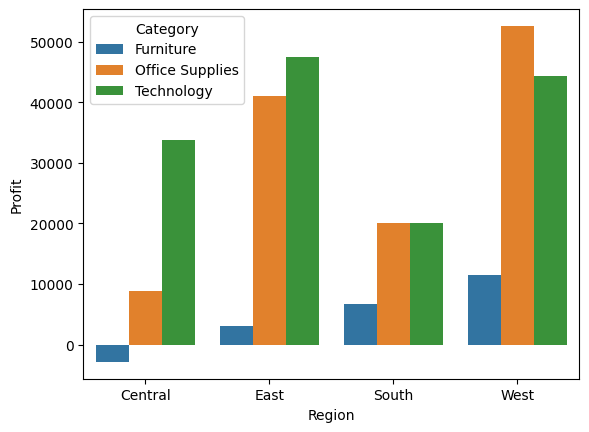

In [ ]:
# Bar chart of region and category by sales percentage
sns.barplot(data=regcat_profit, x='Region', y='Profit', hue='Category')

The furniture category provides the lowest profits across all regions, even in the central region the furniture category actually experiences losses.

## 4. What segments are the main revenue contributors in sales?

In [ ]:
# Grouping states by sales
segment_sales = data.groupby('Segment')['Sales'].sum().astype(int)

# Count states by sales in percentage
segment_sales_percentage = ((segment_sales / segment_sales.sum()) * 100).apply(lambda x: f'{x:.1f}')

segment = pd.merge(segment_sales, segment_sales_percentage, on='Segment')
segment = segment.rename(columns={
    'Sales_x': 'Total_Sales',
    'Sales_y': 'Percentage_Sales'
})
print("Percentage of Sales by Segment:")
print(segment)

Percentage of Sales by Segment:
             Total_Sales Percentage_Sales
Segment                                  
Consumer         1161401             50.6
Corporate         706146             30.7
Home Office       429653             18.7


In [ ]:
# Grouping sales by region and category
segmen_sub_sales = pd.pivot_table(
    data=data,
    index= ['Segment', 'Sub-Category', 'Category'],
    values= 'Quantity',
    aggfunc= 'sum'
).reset_index()

segmen_sub_sales = segmen_sub_sales[segmen_sub_sales['Segment'] == 'Consumer']
segmen_sub_sales.sort_values(by=['Quantity'], inplace=True, ascending=False)

print("Sub-Categories Purchased by Consumers:")
print(segmen_sub_sales)

Sub-Categories Purchased by Consumers:
     Segment Sub-Category         Category  Quantity
3   Consumer      Binders  Office Supplies      3015
12  Consumer        Paper  Office Supplies      2602
9   Consumer  Furnishings        Furniture      1834
13  Consumer       Phones       Technology      1685
2   Consumer          Art  Office Supplies      1625
14  Consumer      Storage  Office Supplies      1619
0   Consumer  Accessories       Technology      1578
5   Consumer       Chairs        Furniture      1234
1   Consumer   Appliances  Office Supplies       908
10  Consumer       Labels  Office Supplies       715
16  Consumer       Tables        Furniture       602
4   Consumer    Bookcases        Furniture       496
8   Consumer    Fasteners  Office Supplies       473
7   Consumer    Envelopes  Office Supplies       442
15  Consumer     Supplies  Office Supplies       359
11  Consumer     Machines       Technology       217
6   Consumer      Copiers       Technology       117


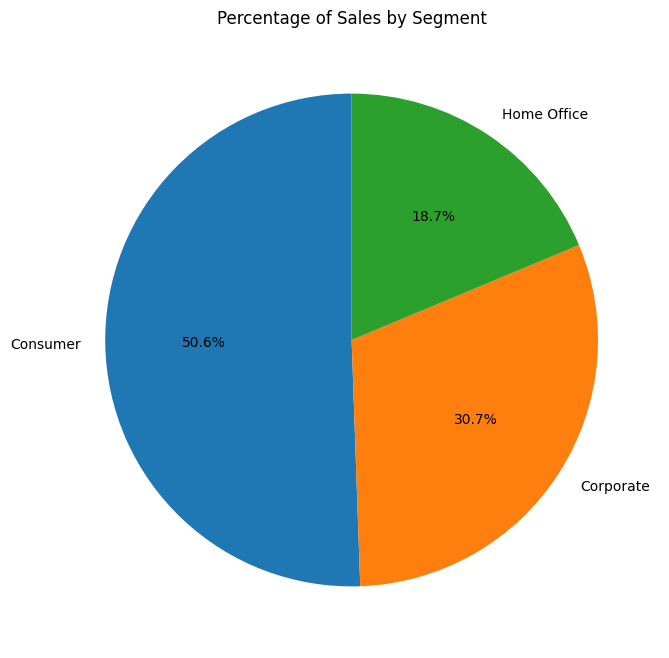

In [ ]:
# Plot pie chart of state by sales percentage
plt.figure(figsize=(10, 8))
segment_sales_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Sales by Segment')
plt.ylabel('')
plt.show()

*   The primary revenue contributor comes from the Consumer segment, accounting for 50.6% of total sales, followed by the Corporate segment at 30.7% and then the Home Office segment at 18.7%.
*   Purchases by consumers are dominated by the Office Supply category, with the largest purchase being 3015 units of Binders products.

## 5. Which shipping mode do customers use the most?"

In [ ]:
# make a new column contains the result of the date between ship_date minus order_date
data['Date_Diff'] = (data['Ship_Date'] - data['Order_Date']).dt.days
data.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,...,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region,month_year,Date_Diff
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,...,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,2019-11,3
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,...,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,2019-11,3
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,...,2019-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,2019-06,4
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,...,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,2018-10,7
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,...,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,2018-10,7


In [ ]:
# Grouping date_diff and order_id by ship_mode
avg = data.groupby('Ship_Mode')['Date_Diff'].mean().apply(lambda x: f'{x:.0f}')
order = data.groupby('Ship_Mode')['Order_ID'].nunique()

ship = pd.merge(avg, order, on='Ship_Mode')
ship = ship.rename(columns={
    'Date_Diff': 'Average Days',
    'Order_ID': 'Total Order'
})

ship.sort_values(by=['Average Days', 'Total Order'], inplace=True, ascending=[False, False])

print(ship)

               Average Days  Total Order
Ship_Mode                               
Standard Class            5         2994
Second Class              3          964
First Class               2          787
Same Day                  0          264


* On average, the longest delivery time for goods is Standard Class, while the fastest delivery is Same Day (the same day as the purchase).
* Even though Standard Class has the longest shipping time, it has the largest number of users. This may be influenced by cheaper shipping prices. Then followed by Second Class and First Class.
* Meanwhile, Same Day has the fewest users, even though the delivery time is the fastest. This may be influenced by higher shipping prices.